# Business Understanding

The purpose of this project is to answer questions about current films in order to give recommendations to our company, who is new to creating movies. By cleaning, organizing, and analyzing various data sets, the following questions are answered: 
1. Which movie genres receive the highest ratings?
2. Does production budget impact a movie's profit?
3. What studios make the most money?
4. When is the best time of year to release a movie?

In [1]:
#initial reactions: which studio to work with? which genre?? which months are best to release??

#adjust $$$ for inflation

#sql join movie basics and movie ratings table: use IMDB avg ratings to prove which GENRES have better RATINGS

#sql join """" to show RATINGS versus RUN TIME

#using bom_df: which STUDIOS make most MONEY (to study them further..?)

#use TN data to show PRODUCTION BUDGET versus gross $$ to show if spending a certain amount on production has higher pay off

# Data Understanding

Box Office Mojo
IMDB
Rotten Tomatoes
TheMovieDB
The Numbers


## Data Preparation

I begin by importing libraries, creating a dataframe for each set of data, and preview each dataframe.

#### Importing relevant libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import pandasql
%matplotlib inline

#### Box Office Mojo

In [3]:
#Creating a dataframe for Box Office Money data
bom_df = pd.read_csv('data/bom.movie_gross.csv.gz')
bom_df.head(2)

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010


In [4]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


#### The Movie Database

In [5]:
#Creating a dataframe for The Movie Database data
tmdb_df = pd.read_csv('data/tmdb.movies.csv.gz')
tmdb_df.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [6]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


#### Rotten Tomatoes Info

In [7]:
#Creating a dataframe for Rotten Tomatoes Info data
rtinf_df = pd.read_csv('data/rt.movie_info.tsv.gz', delimiter = '\t', encoding = 'unicode_escape')
rtinf_df.head(2) 

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One


In [8]:
rtinf_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [9]:
rtinf_df.isnull().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

#### Rotten Tomatoes Reviews

In [10]:
#Creating a dataframe for Rotten Tomatoes Reviews data
rtrev_df = pd.read_csv('data/rt.reviews.tsv.gz', delimiter = '\t', encoding = 'unicode_escape')
rtrev_df.head(2) 

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"


In [11]:
rtrev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          54432 non-null  int64 
 1   review      48869 non-null  object
 2   rating      40915 non-null  object
 3   fresh       54432 non-null  object
 4   critic      51710 non-null  object
 5   top_critic  54432 non-null  int64 
 6   publisher   54123 non-null  object
 7   date        54432 non-null  object
dtypes: int64(2), object(6)
memory usage: 3.3+ MB


In [12]:
rtrev_df.isnull().sum()

id                0
review         5563
rating        13517
fresh             0
critic         2722
top_critic        0
publisher       309
date              0
dtype: int64

#### The Numbers

In [13]:
#Creating a dataframe for The Numbers data
tn_df = pd.read_csv('data/tn.movie_budgets.csv.gz')
tn_df.head(2) 

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [14]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


#### IMDB Ratings

In [15]:
#create the connection to the SQL database
conn = sqlite3.connect('data/im.db')
cur = conn.cursor()

In [16]:
#create dataframe for movie ratings table from imdb database
imdb_ratings_df = pd.read_sql("""
    SELECT *
    FROM movie_ratings;
""", conn)
imdb_ratings_df

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [17]:
imdb_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


#### IMDB Basics

In [18]:
#create dataframe for movie basics table from imdb database
imdb_basics_df = pd.read_sql("""
    SELECT *
    FROM movie_basics;
""", conn)
imdb_basics_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [19]:
imdb_basics_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [20]:
imdb_basics_df.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

## 1. Which movie genres have the highest ratings?

imdb_ratings_df and imdb_basics are used to answer this question as they contain the genres and average ratings.
First, we answer with the genre-combinations as listed in the data frame. 
Second, we answer with the genres separated out:

In [21]:
#reminder what imdb_ratings_df contains
imdb_ratings_df.head(2) 

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559


In [22]:
#reminder what imdb_basics_df contains
imdb_basics_df.head(2) 

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"


In [23]:
#Making a new dataframe of ordered values (by movie_id) with imdb_ratings
imdb_ratings_ord_df = imdb_ratings_df.sort_values(by = ['movie_id'])
imdb_ratings_ord_df.reset_index(drop=True, inplace = True)
imdb_ratings_ord_df 

,movie_id,averagerating,numvotes
0,tt0063540,7.0,77
1,tt0066787,7.2,43
2,tt0069049,6.9,4517
3,tt0069204,6.1,13
4,tt0100275,6.5,119
...,...,...,...
73851,tt9913084,6.2,6
73852,tt9914286,8.7,136
73853,tt9914642,8.5,8
73854,tt9914942,6.6,5


In [24]:
#Making a new dataframe of ordered values (by movie_id) with imdb_basics 
imdb_basics_ord_df = imdb_basics_df.sort_values(by = ['movie_id'])
imdb_basics_ord_df.reset_index(drop=True, inplace = True)
imdb_basics_ord_df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [25]:
#Merging the ordered dataframes
imdb_comb_df = pd.merge(imdb_ratings_ord_df,
                      imdb_basics_ord_df[['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes',
                                 'genres']], on = 'movie_id')
imdb_comb_df 

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,7.0,77,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,7.2,43,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,6.9,4517,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,6.1,13,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,6.5,119,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...,...,...
73851,tt9913084,6.2,6,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary
73852,tt9914286,8.7,136,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family"
73853,tt9914642,8.5,8,Albatross,Albatross,2017,NaN,Documentary
73854,tt9914942,6.6,5,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None


In [26]:
#taking a look at the different genres
imdb_comb_df['genres'].value_counts() 

Drama                           11612
Documentary                     10313
Comedy                           5613
Horror                           2692
Comedy,Drama                     2617
                                ...  
Animation,Sci-Fi,War                1
Adventure,Mystery,Romance           1
Animation,History,Musical           1
Documentary,Music,Reality-TV        1
Drama,Sci-Fi,Western                1
Name: genres, Length: 923, dtype: int64

In [27]:
#drop rows where there genres column is null
imdb_comb_df= imdb_comb_df.dropna(subset=['genres'])

In [28]:
imdb_comb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   averagerating    73052 non-null  float64
 2   numvotes         73052 non-null  int64  
 3   primary_title    73052 non-null  object 
 4   original_title   73052 non-null  object 
 5   start_year       73052 non-null  int64  
 6   runtime_minutes  65720 non-null  float64
 7   genres           73052 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


### Question 1 Answer with Genre Combinations:

In [29]:
#making a new dataframe to look at average rating of each genre 
imdb1 = imdb_comb_df.groupby(['genres', 'averagerating']).sum().reset_index().groupby('genres').mean()
imdb1 

,averagerating,numvotes,start_year,runtime_minutes
genres,,,,
Action,5.500000,4165.278481,24961.670886,941.873418
"Action,Adult,Comedy",4.650000,18.000000,2014.000000,35.500000
"Action,Adventure",5.220930,2535.139535,3185.255814,151.906977
"Action,Adventure,Animation",6.027273,81148.704545,7646.613636,333.886364
"Action,Adventure,Biography",6.988235,58805.941176,2489.176471,111.705882
...,...,...,...,...
Thriller,5.233784,5953.567568,42335.972973,1651.432432
"Thriller,War",5.650000,1791.500000,2013.250000,88.750000
"Thriller,Western",7.150000,3322.000000,2013.250000,47.500000


In [30]:
#sorting by average rating
imdb1_av_rt = imdb1.sort_values(by = ['averagerating'], ascending = False)
imdb1_av_rt 

,averagerating,numvotes,start_year,runtime_minutes
genres,,,,
"Comedy,Documentary,Fantasy",9.4,5.0,2015.0,70.0
"Documentary,Family,Musical",9.3,19.0,2017.0,59.0
"History,Sport",9.2,5.0,2016.0,0.0
"Music,Mystery",9.0,5.0,2012.0,0.0
Game-Show,9.0,7.0,2013.0,130.0
...,...,...,...,...
"Crime,Music",2.4,88.0,2018.0,94.0
"Adventure,Crime,Romance",2.3,9.0,2011.0,86.0
"History,Sci-Fi,Thriller",2.3,227.0,2017.0,120.0


In [31]:
#resetting the index
imdb1_av_rt.reset_index(inplace=True) 

In [32]:
imdb1_av_rt.head()

,genres,averagerating,numvotes,start_year,runtime_minutes
0,"Comedy,Documentary,Fantasy",9.4,5.0,2015.0,70.0
1,"Documentary,Family,Musical",9.3,19.0,2017.0,59.0
2,"History,Sport",9.2,5.0,2016.0,0.0
3,"Music,Mystery",9.0,5.0,2012.0,0.0
4,Game-Show,9.0,7.0,2013.0,130.0


In [33]:
#cleaning up the df 
del imdb1_av_rt['start_year']
del imdb1_av_rt['numvotes']
del imdb1_av_rt['runtime_minutes']

In [34]:
#selecting the top 10
imdb1_av_rt = imdb1_av_rt.head(10)

                        genres  averagerating
0   Comedy,Documentary,Fantasy            9.4
1   Documentary,Family,Musical            9.3
2                History,Sport            9.2
3                Music,Mystery            9.0
4                    Game-Show            9.0
5       Documentary,News,Sport            8.8
6  Documentary,News,Reality-TV            8.8
7            Drama,Fantasy,War            8.8
8                  Drama,Short            8.8
9      Comedy,Drama,Reality-TV            8.8


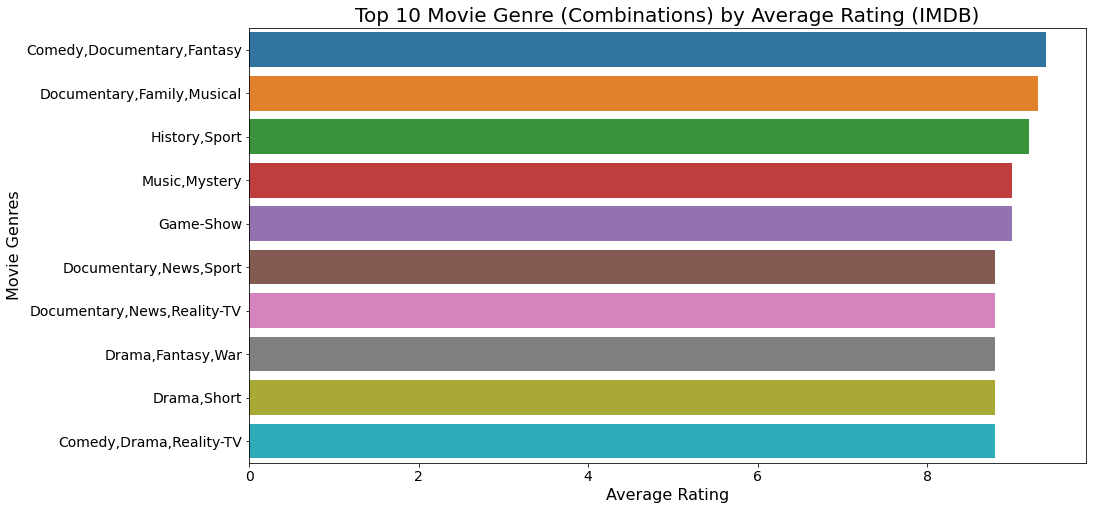

In [35]:
#plotting a bar plot showing top movie genres/ genre combinations by average rating using IMDB
print(imdb1_av_rt)
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'averagerating', y = 'genres', data = imdb1_av_rt)
plt.xlabel('Average Rating', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Movie Genres', fontsize = 16)
plt.yticks(fontsize = 14)
plt.title('Top 10 Movie Genre (Combinations) by Average Rating (IMDB)', fontsize = 20)
plt.show();

#### What movie genres receive the most votes?

In [36]:
#New dataframe with the average rating of each genre and number of votes
imdb2 = imdb_comb_df.groupby(['genres', 'numvotes']).sum().reset_index().groupby('genres').mean()
imdb2 

,numvotes,averagerating,start_year,runtime_minutes
genres,,,,
Action,910.437126,16.876647,5904.107784,222.778443
"Action,Adult,Comedy",18.000000,4.650000,2014.000000,35.500000
"Action,Adventure",1676.446154,5.464615,2107.169231,100.492308
"Action,Adventure,Animation",24115.945946,7.405405,2273.317568,99.263514
"Action,Adventure,Biography",49984.600000,7.415000,2115.800000,94.950000
...,...,...,...,...
Thriller,801.040948,19.116595,6751.857759,263.375000
"Thriller,War",1791.500000,5.650000,2013.250000,88.750000
"Thriller,Western",3322.000000,7.150000,2013.250000,47.500000


In [37]:
#sorting by number of votes 
imdb2_vote= imdb2.sort_values(by = ['numvotes'], ascending = False)
imdb2_vote 

,numvotes,averagerating,start_year,runtime_minutes
genres,,,,
"Action,Adventure,Sci-Fi",195108.474576,6.087288,2168.211864,113.169492
"Adventure,Mystery,Sci-Fi",135042.500000,5.075000,2013.500000,105.500000
"Action,Fantasy,War",131509.000000,6.400000,2016.000000,51.000000
"Adventure,Drama,Sci-Fi",104543.894737,6.494737,2120.842105,109.789474
"Action,Adventure,Fantasy",96588.500000,5.533000,2074.970000,108.320000
...,...,...,...,...
"Music,Mystery",5.000000,9.000000,2012.000000,0.000000
"Comedy,Documentary,Fantasy",5.000000,9.400000,2015.000000,70.000000
"Horror,Musical,Romance",5.000000,5.200000,2013.000000,0.000000


In [38]:
imdb2_vote.reset_index(inplace=True) #resetting index

In [39]:
#cleaning up
del imdb2_vote['start_year']
del imdb2_vote['averagerating']
del imdb2_vote['runtime_minutes']

In [40]:
#selecting the top 10
imdb2_vote = imdb2_vote.head(10)

                      genres       numvotes
0    Action,Adventure,Sci-Fi  195108.474576
1   Adventure,Mystery,Sci-Fi  135042.500000
2         Action,Fantasy,War  131509.000000
3     Adventure,Drama,Sci-Fi  104543.894737
4   Action,Adventure,Fantasy   96588.500000
5   Biography,Drama,Thriller   84506.909091
6  Action,Adventure,Thriller   83279.511111
7        Action,Crime,Sci-Fi   78214.125000
8   Action,Adventure,Mystery   66149.272727
9    Adventure,Drama,Fantasy   61488.175000


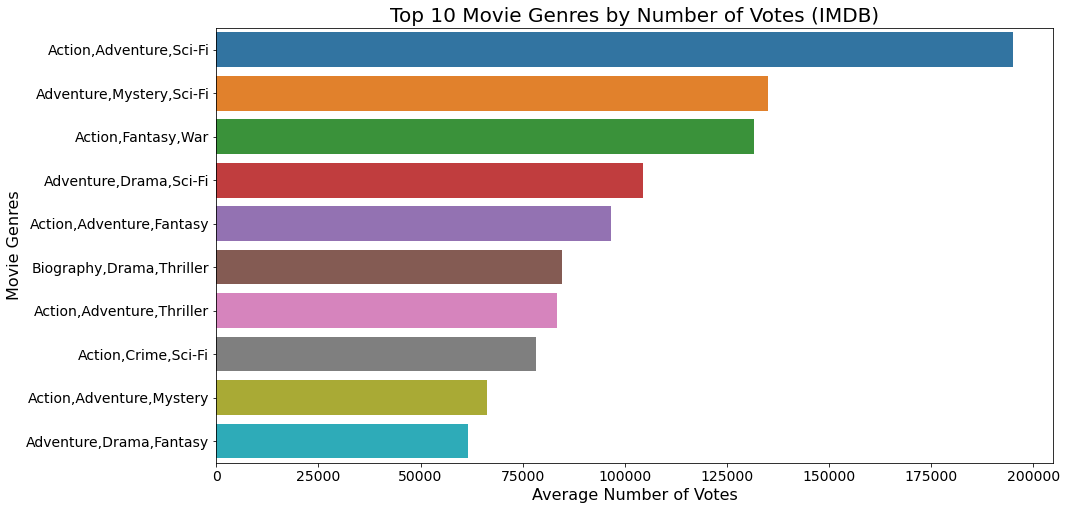

In [41]:
print(imdb2_vote)
#plotting a bar plot
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'numvotes', y = 'genres', data = imdb2_vote)
plt.xlabel('Average Number of Votes', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Movie Genres', fontsize = 16)
plt.yticks(fontsize = 14)
plt.title('Top 10 Movie Genres by Number of Votes (IMDB)', fontsize = 20)
plt.show();

### What movie genres are most commonly produced?

In [42]:
imdb_comb_df.head()

,movie_id,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,7.0,77,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,7.2,43,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,6.9,4517,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,6.1,13,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,6.5,119,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [43]:
#separate each movie with multple genres into their own row
imdb_comb_df["genres"] = imdb_comb_df["genres"].str.split(",")
imdb_comb_df_exploded= imdb_comb_df.explode("genres")

<ipython-input-43-f4b1f5df05fb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_comb_df["genres"] = imdb_comb_df["genres"].str.split(",")


In [44]:
#get a count of each time a genre was listed
genre_counts = imdb_comb_df_exploded.groupby('genres').size().reset_index(name='count')

print(genre_counts)

         genres  count
0        Action   6988
1         Adult      3
2     Adventure   3817
3     Animation   1743
4     Biography   3809
5        Comedy  17290
6         Crime   4611
7   Documentary  17753
8         Drama  30788
9        Family   3412
10      Fantasy   2126
11    Game-Show      2
12      History   2825
13       Horror   7674
14        Music   1968
15      Musical    721
16      Mystery   3039
17         News    579
18   Reality-TV     17
19      Romance   6589
20       Sci-Fi   2206
21        Short      1
22        Sport   1179
23     Thriller   8217
24          War    853
25      Western    280


In [45]:
#sort descending order
sorted_genre_counts = genre_counts.sort_values(by='count', ascending=False)
sorted_genre_counts

,genres,count
8,Drama,30788
7,Documentary,17753
5,Comedy,17290
23,Thriller,8217
13,Horror,7674
0,Action,6988
19,Romance,6589
6,Crime,4611
2,Adventure,3817
4,Biography,3809


         genres  count
8         Drama  30788
7   Documentary  17753
5        Comedy  17290
23     Thriller   8217
13       Horror   7674
0        Action   6988
19      Romance   6589
6         Crime   4611
2     Adventure   3817
4     Biography   3809


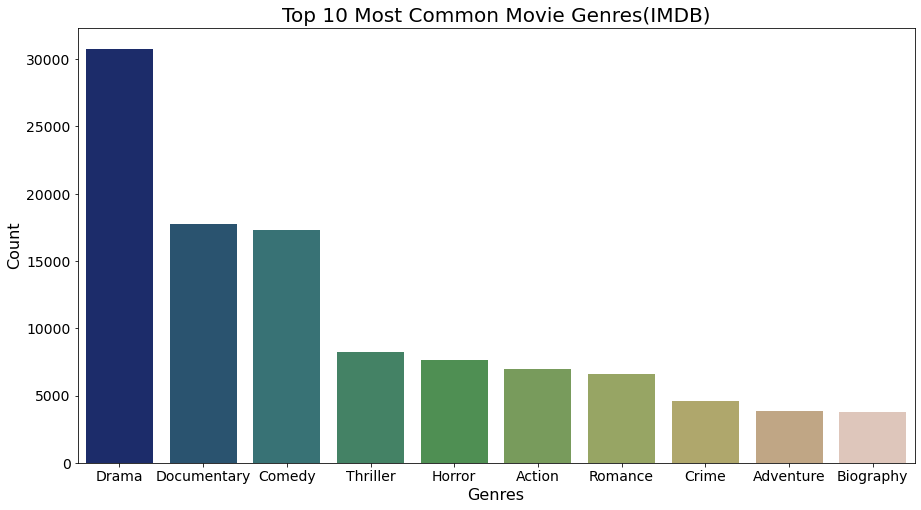

In [46]:
#plotting a bar plot of 10 most common genres
sorted_genre_counts = sorted_genre_counts.head(10)

print(sorted_genre_counts)
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'genres', y = 'count', data = sorted_genre_counts, palette='gist_earth')
plt.xlabel('Genres', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Count', fontsize = 16)
plt.yticks(fontsize = 14)
plt.title('Top 10 Most Common Movie Genres(IMDB)', fontsize = 20)
plt.show();

### Question 1 Answer with Genres separated:

In [47]:
#making a new dataframe to look at average rating of each genre 
imdb_comb_df_exploded2 = imdb_comb_df_exploded.groupby(['genres', 'averagerating']).sum().reset_index().groupby('genres').mean()

In [48]:
#sorting by rating
imdb_comb_df_exploded3 = imdb_comb_df_exploded2.sort_values(by = ['averagerating'], ascending = False)

In [49]:
#resetting the index
imdb_comb_df_exploded3.reset_index(inplace=True)

In [50]:
#cleaning up the df 
del imdb_comb_df_exploded3['start_year']
del imdb_comb_df_exploded3['numvotes']
del imdb_comb_df_exploded3['runtime_minutes']

       genres  averagerating
0       Short       8.800000
1   Game-Show       7.300000
2        News       6.718868
3  Reality-TV       6.164286
4       Sport       6.134783
5   Biography       5.772500
6       Music       5.732051
7     Musical       5.674026
8         War       5.648052
9     History       5.625610


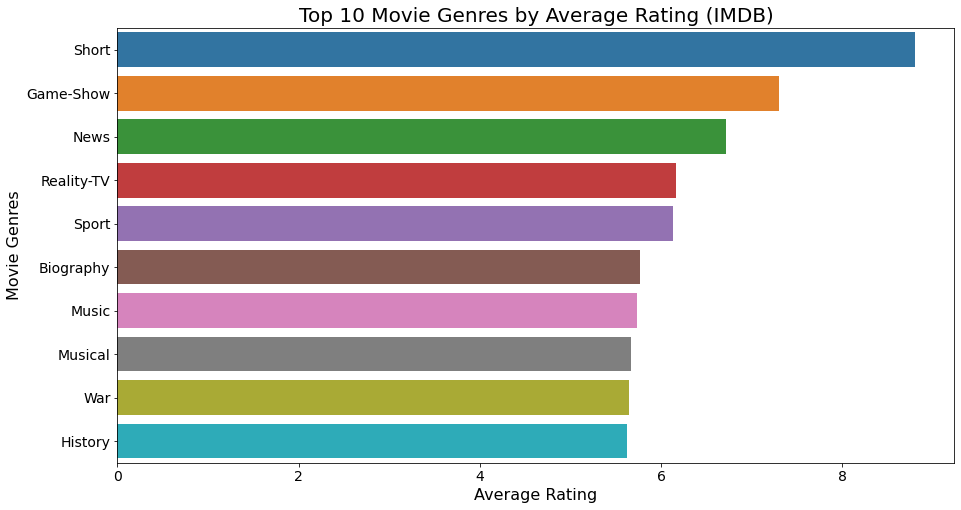

In [51]:
#selecting the top 10
imdb_comb_df_exploded3 = imdb_comb_df_exploded3[:10]

#plotting a bar plot showing top movie genres by average rating using IMDB
print(imdb_comb_df_exploded3)
plt.figure(figsize = (15, 8))
ax = sns.barplot(x = 'averagerating', y = 'genres', data = imdb_comb_df_exploded3)
plt.xlabel('Average Rating', fontsize = 16)
plt.xticks(fontsize = 14)
plt.ylabel('Movie Genres', fontsize = 16)
plt.yticks(fontsize = 14)
plt.title('Top 10 Movie Genres by Average Rating (IMDB)', fontsize = 20)
plt.show();

### Question 1 Findings: Which movie genres receive the highest ratings?

According to the IMDB data:

The 5 most commonly produced movie genres are:
1. **Drama**
2. **Documentary**
3. **Comedy**
4. **Thriller**   
5. **Horror**

The 3 highest rated movie genre combinations are:
1. **Comedy,Documentary,Fantasy** with a rating of 9.40
2. **Documentary,Family,Musical** with a rating of 9.30
3. **History,Sport with a rating** of 9.20

The 3 highest rated movie genres are:
1. **Short** with a rating of 8.80
2. **Game-Show** with a rating of 7.30
3. **News** with a rating of 6.72

The 3 most voted-for movie genre combinations are:
1. **Action,Adventure,Sci-Fi**  with 195,108 votes
2. **Adventure,Mystery,Sci-Fi** with 135,042 votes
3. **Action,Fantasy,War**  with 131, 509 votes



Just because a movie is highly rated, most common, or most voted for, that woudldn't necessarily mean that it does the best at the box office. Next, we look into budget and profit.

## 2. Does production budget impact a movie's profit?

I will be using The Numbers dataframe to look further into budget vs profit.

In [52]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [53]:
tn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [54]:
#define function to clean up the currency columns
def clean_and_convert_to_float(df, columns):
    for col in columns:
        df[col] = df[col].astype(str).str.replace(r'[\$,]', '', regex=True).astype(float)
    return df

In [55]:
#apply the funtion to our dataframe
clean_and_convert_to_float(tn_df, ('production_budget', 'domestic_gross', 'worldwide_gross'))

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
5778,79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.0,0.0,0.000000e+00


In [56]:
#convert date column to datetime, and add year and month column 
tn_df['release_date'] = pd.to_datetime(tn_df['release_date'])
tn_df['year'] = tn_df['release_date'].dt.year
tn_df['month'] = tn_df['release_date'].dt.month_name()

In [57]:
#create profit and profit_margin column

tn_df['profit'] = tn_df['worldwide_gross'] - tn_df['production_budget']

tn_df['profit_margin'] = (tn_df['worldwide_gross'] - 
                                    tn_df['production_budget'])/tn_df['worldwide_gross']


In [58]:
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,profit,profit_margin
0,1,2009-12-18,Avatar,425000000.0,760507625.0,2.776345e+09,2009,December,2.351345e+09,0.846921
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09,2011,May,6.350639e+08,0.607331
2,3,2019-06-07,Dark Phoenix,350000000.0,42762350.0,1.497624e+08,2019,June,-2.002376e+08,-1.337036
3,4,2015-05-01,Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09,2015,May,1.072414e+09,0.764364
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09,2017,December,9.997217e+08,0.759251


In [59]:
#adjusting dataframe for inflation using average 3.2%/year
tn_df['adjusted_budget'] = ((((2025-tn_df['year'])*.032)+1)*tn_df['production_budget'])

#Suppressing Scienific Notation
pd.options.display.float_format = '{:.2f}'.format

tn_df['adjusted_profit'] = (((2025-tn_df['year'])*.032)+1)*tn_df['profit']
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year,month,profit,profit_margin,adjusted_budget,adjusted_profit
0,1,2009-12-18,Avatar,425000000.00,760507625.00,2776345279.00,2009,December,2351345279.00,0.85,642600000.00,3555234061.85
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,2011,May,635063875.00,0.61,594548800.00,919572491.00
2,3,2019-06-07,Dark Phoenix,350000000.00,42762350.00,149762350.00,2019,June,-200237650.00,-1.34,417200000.00,-238683278.80
3,4,2015-05-01,Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,2015,May,1072413963.00,0.76,436392000.00,1415586431.16
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,2017,December,999721747.00,0.76,398152000.00,1255650514.23


In [60]:
tn_df_sorted = tn_df.sort_values(by='adjusted_profit', ascending=False)

budget_group
extremely low      52616467.46
very low          207207799.05
low               477216021.80
medium            731824845.36
high              974753636.69
very high        1045550589.80
extremely high   2237403276.42
Name: adjusted_profit, dtype: float64


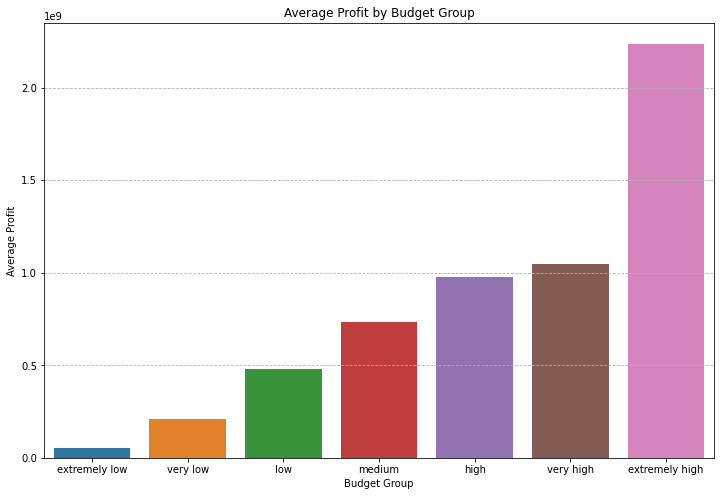

In [61]:
#create budget bins and plot to see if spending more on budget means a movie will make more
bins = pd.cut(tn_df['adjusted_budget'], bins=7, labels=['extremely low', 'very low', 'low', 'medium', 'high', 'very high', 'extremely high'])
tn_df['budget_group'] = bins

#average profit for each budget group
average_profit_by_budget = tn_df.groupby('budget_group')['adjusted_profit'].mean()
print(average_profit_by_budget)


plt.figure(figsize=(12, 8))
sns.barplot(x=average_profit_by_budget.index, y=average_profit_by_budget.values)
plt.title('Average Profit by Budget Group')
plt.xlabel('Budget Group')
plt.ylabel('Average Profit')
plt.grid(axis='y', linestyle='--')
plt.show()

In [62]:
#only movies that made a profit
profitable_tn_df= tn_df[tn_df['profit_margin'] >= 0]

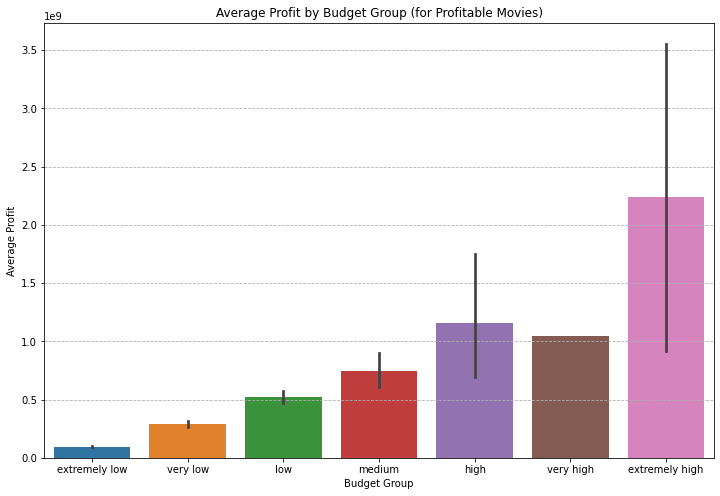

budget_group
extremely low      96717639.89
very low          289182429.21
low               521059166.74
medium            746488722.78
high             1158832605.44
very high        1045550589.80
extremely high   2237403276.42
Name: adjusted_profit, dtype: float64


In [63]:
plt.figure(figsize=(12, 8))
sns.barplot(x='budget_group', y='adjusted_profit', data=profitable_tn_df)
plt.title('Average Profit by Budget Group (for Profitable Movies)')
plt.xlabel('Budget Group')
plt.ylabel('Average Profit')
plt.grid(axis='y', linestyle='--')
plt.show()

average_profit_by_budget_prof = profitable_tn_df.groupby('budget_group')['adjusted_profit'].mean()
print(average_profit_by_budget_prof)

budget_group
extremely low      96717639.89
very low          289182429.21
low               521059166.74
medium            746488722.78
high             1158832605.44
very high        1045550589.80
extremely high   2237403276.42
Name: adjusted_profit, dtype: float64


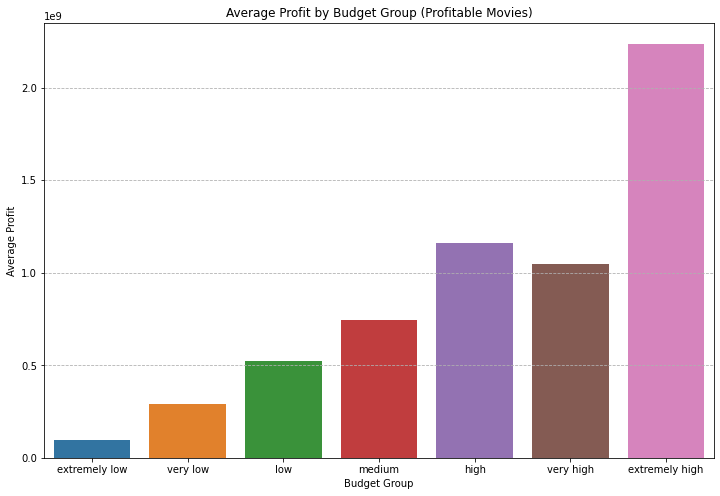

In [64]:
#average profit for each budget group - profitable movies
average_profit_by_budget_prof = profitable_tn_df.groupby('budget_group')['adjusted_profit'].mean()
print(average_profit_by_budget_prof)

plt.figure(figsize=(12, 8))
sns.barplot(x=average_profit_by_budget_prof.index, y=average_profit_by_budget_prof.values)
plt.title('Average Profit by Budget Group (Profitable Movies)')
plt.xlabel('Budget Group')
plt.ylabel('Average Profit')
plt.grid(axis='y', linestyle='--') 
plt.show()

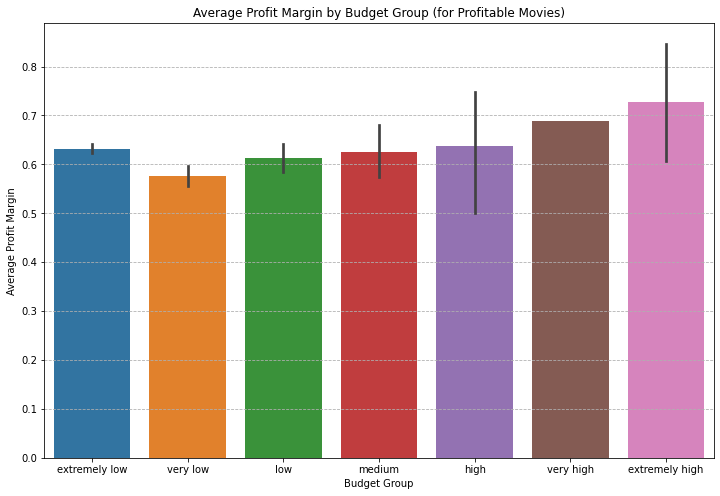

budget_group
extremely low    0.63
very low         0.58
low              0.61
medium           0.62
high             0.64
very high        0.69
extremely high   0.73
Name: profit_margin, dtype: float64


In [65]:
#average profit margin by budget group for profitable movies
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='budget_group', y='profit_margin', data=profitable_tn_df)
plt.title('Average Profit Margin by Budget Group (for Profitable Movies)')
plt.xlabel('Budget Group')
plt.ylabel('Average Profit Margin')
plt.grid(axis='y', linestyle='--')
plt.show()

average_profit_margin_by_budget = profitable_tn_df.groupby('budget_group')['profit_margin'].mean()
print(average_profit_margin_by_budget)

### Question 2 Findings: Does production budget impact a movie's profit?

## 3. What time of year would be best to release a movie?

In [66]:
tn_df_month = tn_df.groupby('month')['adjusted_profit'].mean()

In [67]:
sorted_tn_df_month = tn_df_month.sort_values(ascending=False)

In [68]:
print(sorted_tn_df_month)

month
May         187306674.39
June        165026942.44
July        156310559.44
November    149272579.82
December    114719378.11
March        76804920.78
February     66392611.17
August       57159609.62
April        53106311.46
October      46140455.00
September    38848882.00
January      37922679.21
Name: adjusted_profit, dtype: float64


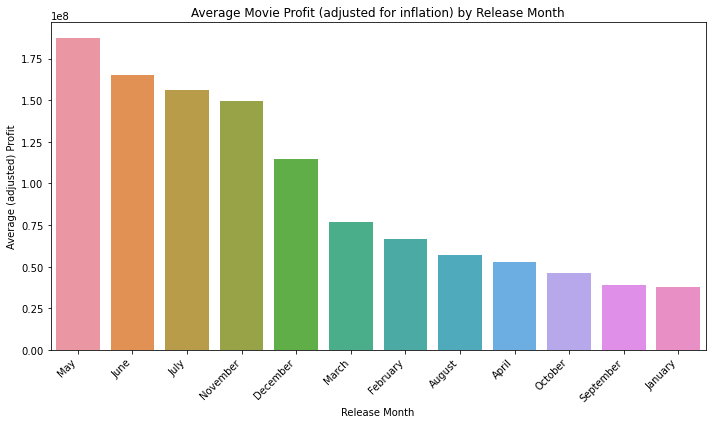

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_tn_df_month.index, y=sorted_tn_df_month.values)
plt.title('Average Movie Profit (adjusted for inflation) by Release Month')
plt.xlabel('Release Month')
plt.ylabel('Average (adjusted) Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Which movie studios make the most money?

In [70]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010


In [71]:
bom_df['foreign_gross'] = bom_df['foreign_gross'].fillna(0.0)

In [72]:
bom_df['domestic_gross'] = bom_df['domestic_gross'].fillna(0.0)

In [73]:
bom_df= bom_df.dropna(subset=['studio'])

In [74]:
bom_df.isnull().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [75]:
#apply the cleaning currency funtion to our dataframe
clean_and_convert_to_float(bom_df, ('domestic_gross', 'foreign_gross'))

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000.00,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010
3,Inception,WB,292600000.00,535700000.00,2010
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,0.00,2018
3383,Edward II (2018 re-release),FM,4800.00,0.00,2018
3384,El Pacto,Sony,2500.00,0.00,2018
3385,The Swan,Synergetic,2400.00,0.00,2018


In [76]:
#create worldwide_gross column for total profit
bom_df['worldwide_gross'] = bom_df['domestic_gross'] + bom_df['foreign_gross']

In [77]:
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross
0,Toy Story 3,BV,415000000.00,652000000.00,2010,1067000000.00
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010,1025500000.00
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010,960300000.00
3,Inception,WB,292600000.00,535700000.00,2010,828300000.00
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,752600000.00


In [78]:
#adjust for inflation again using the avg 3.2%/year
bom_df['adjusted_profit'] = (((2025-bom_df['year'])*.032)+1)*bom_df['worldwide_gross']
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year,worldwide_gross,adjusted_profit
0,Toy Story 3,BV,415000000.00,652000000.00,2010,1067000000.00,1579160000.00
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010,1025500000.00,1517740000.00
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010,960300000.00,1421244000.00
3,Inception,WB,292600000.00,535700000.00,2010,828300000.00,1225884000.00
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,752600000.00,1113848000.00


In [79]:
bom_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3382 entries, 0 to 3386
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   title            3382 non-null   object 
 1   studio           3382 non-null   object 
 2   domestic_gross   3382 non-null   float64
 3   foreign_gross    3382 non-null   float64
 4   year             3382 non-null   int64  
 5   worldwide_gross  3382 non-null   float64
 6   adjusted_profit  3382 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 211.4+ KB


In [80]:
#new dataframe grouping by studio- using the average adjusted profit
bom_df_stu = bom_df.groupby('studio')['adjusted_profit'].mean()

In [81]:
#new dataframe sorting in descending order
sorted_bom_df_stu = bom_df_stu.sort_values(ascending=False)

In [82]:
print(sorted_bom_df_stu)

studio
HC           1093096800.00
P/DW          736934160.00
BV            557045979.99
GrtIndia      319275200.00
WB (NL)       309369084.41
                  ...     
BSM                7221.60
TAFC               6072.00
Hiber              4521.60
ALP                4054.40
Synergetic         2937.60
Name: adjusted_profit, Length: 257, dtype: float64


studio
HC         1093096800.00
P/DW        736934160.00
BV          557045979.99
GrtIndia    319275200.00
WB (NL)     309369084.41
Fox         306506678.56
WB          296022056.95
Sony        275032318.79
Uni.        269706366.01
Par.        263039730.54
Name: adjusted_profit, dtype: float64


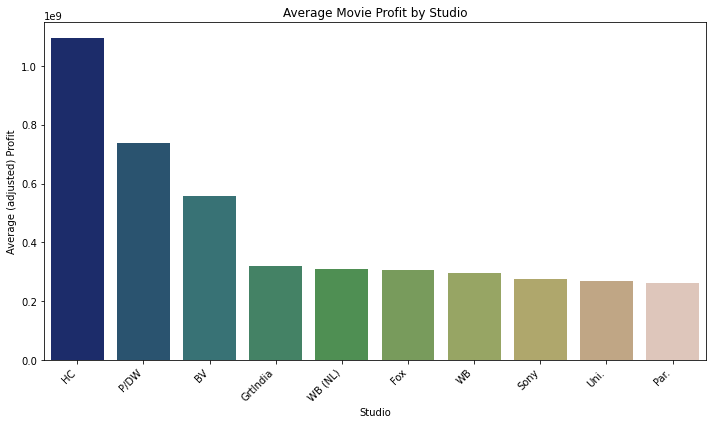

In [83]:
#selecting the top 10 studios and plotting
sorted_bom_df_stu = sorted_bom_df_stu[:10]
print(sorted_bom_df_stu)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_bom_df_stu.index, y=sorted_bom_df_stu.values, palette='gist_earth')
plt.title('Average Movie Profit by Studio')
plt.xlabel('Studio')
plt.ylabel('Average (adjusted) Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [84]:
#new dataframe grouping by studio using the total adjusted profit
bom_df_stu_sum = bom_df.groupby('studio')['adjusted_profit'].sum()
#sorting in descending order
sorted_bom_df_stu_sum = bom_df_stu_sum.sort_values(ascending=False)

studio
BV        59046873879.28
Fox       41684908284.13
WB        41443087973.30
Uni.      39646835803.91
Sony      30253555067.33
Par.      26567012784.14
WB (NL)   13921608798.62
LGF       11666790741.60
P/DW       7369341600.00
LG/S       7288660573.39
Name: adjusted_profit, dtype: float64


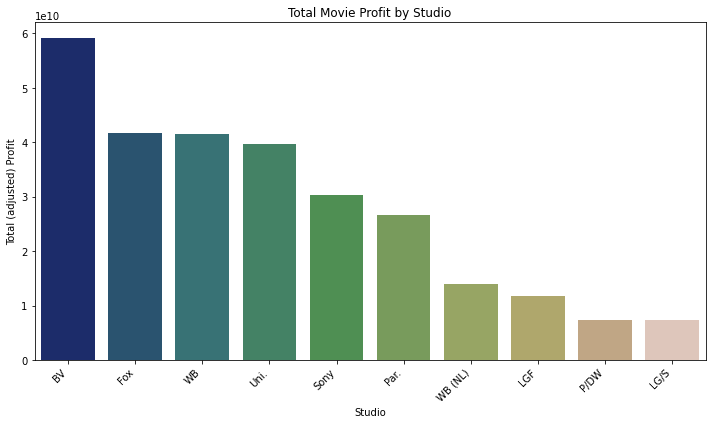

In [85]:
#selecting the top 10 and plotting
sorted_bom_df_stu_sum = sorted_bom_df_stu_sum[:10]
print(sorted_bom_df_stu_sum)

plt.figure(figsize=(10, 6))
sns.barplot(x=sorted_bom_df_stu_sum.index, y=sorted_bom_df_stu_sum.values, palette= 'gist_earth')
plt.title('Total Movie Profit by Studio')
plt.xlabel('Studio')
plt.ylabel('Total (adjusted) Profit')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Exploratory Data Analysis

# Conclusions

## Limitations

## Recommendations

## Next Steps